In [1]:
import os
import torch
import pandas as pd
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# import torchvision.transforms.functional
# import torchvision.transforms.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

from torchinfo import summary
from tqdm import tqdm

# Planet : Amazon space -- Full model running for multilabel classification

!! This is supposed to become the main jupyternotebook to run the multilabel classification and testing !!

Usefull links:
<https://learnopencv.com/multi-label-image-classification-with-pytorch-image-tagging/>

## 0) Initialization
### 0.1) Getting Module and Functions

In [2]:
from Multilabel_Amazon_Engine import checking_folder, train, show_4_image_in_batch, batch_prediction
from Multilabel_Amazon_Module import AmazonSpaces, MultiLayerCNN, AdjustSaturation

In [3]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

## 1) Putting the model on the gpu

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [5]:
model = MultiLayerCNN().to(device)

### + Load previously trained model

In [6]:
if device=="cpu":
    model.load_state_dict(torch.load('model_multilabel_classification.pth', map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load('model_multilabel_classification.pth'))

In [7]:
model.eval()

MultiLayerCNN(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool_max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool_avg): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc): Linear(in_features=14580, out_features=17, bias=True)
  (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): BCELoss()
  (sig): Sigmoid()
)

## 2) Getting the different datasets

In [8]:
train_csv = 'training.csv'
validation_csv = 'validation.csv'
test_csv = 'test.csv'

In [9]:
Transform_choice = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(256),transforms.RandomAutocontrast(p=1), AdjustSaturation(1.2)])

In [10]:
train_dataset = AmazonSpaces(csv_file=train_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
validation_dataset = AmazonSpaces(csv_file=validation_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
test_dataset = AmazonSpaces(csv_file=test_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)

## 3) Wrapping into the different dataloaders

In [11]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,drop_last = True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size,drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)

## 4) Choice of Criterion and Opitimizer

In [12]:
learning_rate = 0.01

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5) TRAINING

In [13]:
epochs_number = 2

The_results = train(model, train_dataloader, validation_dataloader, device=device, optimizer= optim, lr = learning_rate, epochs=epochs_number, loss_fn=criterion)

Training epoch 0 ..... 
Training


1it [00:03,  3.59s/it]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 0.9770992366412213, 'micro/recall': 1.0, 'micro/f1': 0.9884169884169884, 'macro/precision': 0.11764705882352941, 'macro/recall': 0.11764705882352941, 'macro/f1': 0.11764705882352941, 'samples/precision': 0.984375, 'samples/recall': 1.0, 'samples/f1': 0.9906250000000001, 'hamming_loss': 0.0027573529411764708, 'total_loss': 0.11272702666300122}
iter:  0 training:micro f1: 0.988macro f1: 0.118 samples f1: 0.991


21it [00:27,  1.11s/it]

iter: 20 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


41it [00:52,  1.22s/it]

iter: 40 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


61it [01:18,  1.14s/it]

iter: 60 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


81it [01:42,  1.17s/it]

iter: 80 training:micro f1: 0.470macro f1: 0.056 samples f1: 0.461


101it [02:07,  1.30s/it]

iter:100 training:micro f1: 0.667macro f1: 0.118 samples f1: 0.667


121it [02:32,  1.31s/it]

iter:120 training:micro f1: 0.500macro f1: 0.059 samples f1: 0.500


141it [03:00,  1.31s/it]

iter:140 training:micro f1: 0.400macro f1: 0.059 samples f1: 0.400


161it [03:26,  1.38s/it]

iter:160 training:micro f1: 0.642macro f1: 0.118 samples f1: 0.659


181it [03:54,  1.37s/it]

iter:180 training:micro f1: 0.478macro f1: 0.103 samples f1: 0.487


187it [04:02,  1.29s/it]


Validating


62it [01:06,  1.07s/it]


Training epoch 1 ..... 
Training


1it [00:01,  1.14s/it]

image batch size: torch.Size([128, 3, 256, 256])
 Predicted shape: (128, 17) and ground truth shape (128, 17)
{'micro/precision': 1.0, 'micro/recall': 1.0, 'micro/f1': 1.0, 'macro/precision': 0.11764705882352941, 'macro/recall': 0.11764705882352941, 'macro/f1': 0.11764705882352941, 'samples/precision': 1.0, 'samples/recall': 1.0, 'samples/f1': 1.0, 'hamming_loss': 0.0, 'total_loss': 0.08718991872635395}
iter:  0 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


21it [00:24,  1.26s/it]

iter: 20 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


41it [00:51,  1.31s/it]

iter: 40 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


61it [01:14,  1.10s/it]

iter: 60 training:micro f1: 1.000macro f1: 0.118 samples f1: 1.000


81it [01:39,  1.22s/it]

iter: 80 training:micro f1: 0.470macro f1: 0.056 samples f1: 0.461


101it [02:04,  1.32s/it]

iter:100 training:micro f1: 0.667macro f1: 0.118 samples f1: 0.667


121it [02:29,  1.10s/it]

iter:120 training:micro f1: 0.500macro f1: 0.059 samples f1: 0.500


141it [02:55,  1.36s/it]

iter:140 training:micro f1: 0.400macro f1: 0.059 samples f1: 0.400


161it [03:21,  1.35s/it]

iter:160 training:micro f1: 0.642macro f1: 0.118 samples f1: 0.659


181it [03:45,  1.07s/it]

iter:180 training:micro f1: 0.478macro f1: 0.103 samples f1: 0.487


187it [03:52,  1.24s/it]


Validating


62it [01:09,  1.11s/it]

.... ENDED TRAINING THE MODEL !


## 5b) Saving the results into a Json file

In [14]:
import json

# create json object from dictionary
js = json.dumps(The_results)

# open file for writing, "w"
name = f"training_results_{epochs_number}epochs_{batch_size}batchsize_{learning_rate}lr_{criterion}_{str(optim).split()[0]}optim.json"
f = open(name,"a")

# write json object to file
f.write(js)

# close file
f.close()

## 5c) Plotting the training phases metrics

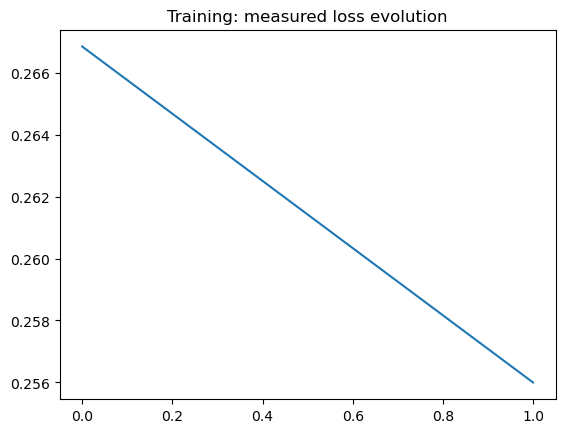

In [15]:
plt.figure()
plt.plot(np.array(The_results['training']['total_loss']))
plt.title('Training: measured loss evolution')
plt.show()

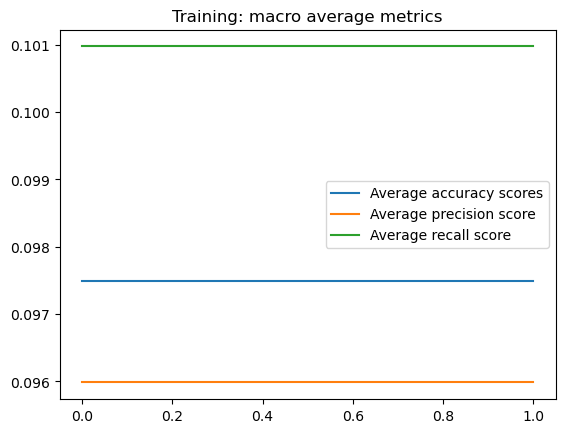

In [17]:
plt.figure()
plt.plot(The_results['training']['macro/f1'])
plt.plot(The_results['training']['macro/precision'])
plt.plot(The_results['training']['macro/recall'])
plt.legend(['Average accuracy scores', 'Average precision score', 'Average recall score'])
plt.title('Training: macro average metrics')
plt.show()

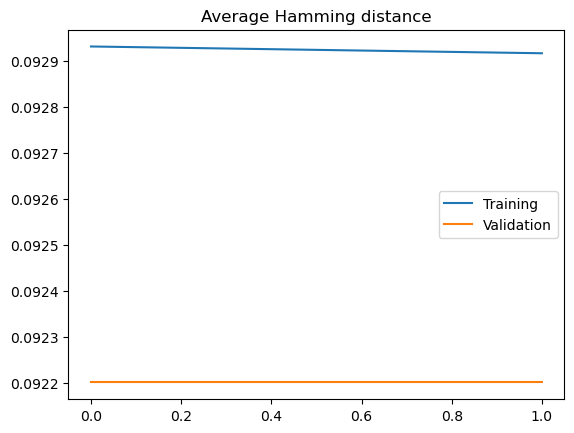

In [18]:
plt.figure()
plt.plot(np.array(The_results['training']['hamming_loss']), label='Training')
plt.plot(np.array(The_results['validating']['hamming_loss']), label='Validation')
plt.legend()
plt.title('Average Hamming distance')
plt.show()

## 6) TESTING

In [42]:
# store stats
losses, accuracies = [], []
count = 0
for batch in tqdm(test_dataloader):
    # TODO run prediction_step
    loss, accuracy, predictions = batch_prediction(batch, model, device = 'cuda')

    # append to stats
    losses.append(loss)
    accuracies.append(accuracy)
    if count == 0:
        all_pred = predictions
        count = 1
    else :
        all_pred = np.vstack((all_pred,predictions))
# average val losses and accuracies over batches
losses, accuracies = np.stack(losses).mean(), np.stack(accuracies).mean()
print(f"valloss {losses:.2f}, val accuracy {accuracies*100:.2f}%")

100%|██████████| 65/65 [02:18<00:00,  2.13s/it]

valloss 0.27, val accuracy 90.25


In [36]:
all_pred

array([[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [0.3828125, 0.8359375, 0.75     , ..., 0.984375 , 0.90625  ,
        0.9375   ],
       [0.3984375, 0.84375  , 0.75     , ..., 0.953125 , 0.859375 ,
        0.9296875],
       [0.3984375, 0.84375  , 0.7265625, ..., 0.9140625, 0.8984375,
        0.8125   ]])

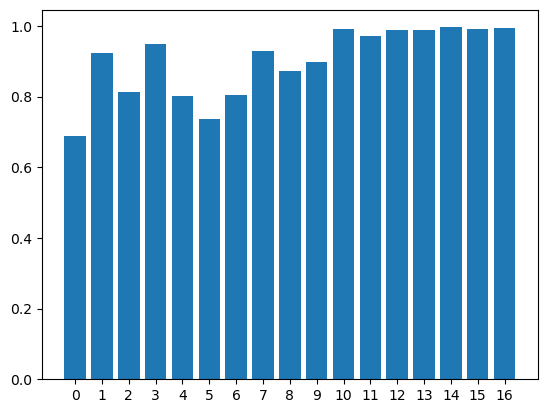

In [45]:
mean_pred = np.stack(all_pred, axis = 0).mean(axis=0)
plt.figure()
plt.bar(x = range(17), height=mean_pred)
plt.xticks(range(17))
plt.title("Accuracy of each class")
plt.show()

# Saving Models

In [46]:
torch.save(model.state_dict(), "model_multilabel_classification.pth")
print("Saved PyTorch Model State to model_multilabel_classification.pth")

Saved PyTorch Model State to model_multilabel_classification.pth
